# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow opencv-python matplotlib

In [2]:
!pip list

In [4]:
import tensorflow as tf
import os

# 2. Remove dodgy images

In [5]:
import cv2
import imghdr

In [6]:
data_dir = 'data' 

In [7]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [8]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list data\tiger\01062023_tzr_tzr_081501.jpg
Image not in ext list data\tiger\1200px-P.t.altaica_Tomak_Male.jpg
Image not in ext list data\tiger\Bengal-tiger.jpg
Image not in ext list data\tiger\e8a51c72a945a8dc68c05755b4b63f83c8-tiger-king.jpg
Image not in ext list data\tiger\International-Tiger-Day-2022.jpg
Image not in ext list data\tiger\mammal-big-cat-Bengal-tiger-cub.jpg
Image not in ext list data\tiger\National-Save-a-Tiger-Month-640x514.jpg
Image not in ext list data\tiger\Siberian-tiger.jpg
Image not in ext list data\tiger\tiger-8-276-384.webp
Image not in ext list data\tiger\tiger-by-a-road-1.jpg
Image not in ext list data\tiger\tiger-Siberian.jpg
Image not in ext list data\zebra\1200px-Zebra_Botswana_edit.jpg
Image not in ext list data\zebra\adult-plains-zebra.jpg
Image not in ext list data\zebra\GettyImages-1169746914.jpg
Image not in ext list data\zebra\group-plains-zebras-stream.jpg
Image not in ext list data\zebra\shutterstock-316593083.jpg
Image not in e

# 3. Load Data

In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [5]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 289 files belonging to 2 classes.


In [45]:
data_iterator = data.as_numpy_iterator()

In [3]:
batch = data_iterator.next()

NameError: name 'data_iterator' is not defined

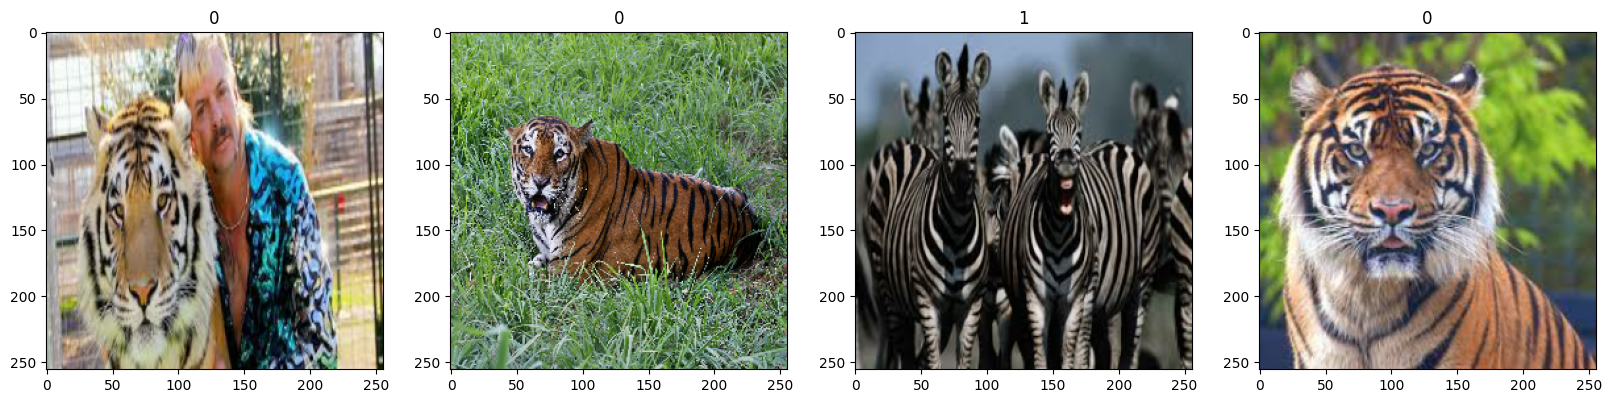

In [51]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [4]:
batch[0].min

NameError: name 'batch' is not defined

In [14]:
data = data.map(lambda x,y: (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [15]:
data.as_numpy_iterator().next()

(array([[[[7.69052088e-01, 6.75047636e-01, 5.41940749e-01],
          [8.19919467e-01, 7.10115552e-01, 5.65017521e-01],
          [3.93062085e-01, 3.20840985e-01, 2.71913290e-01],
          ...,
          [7.73522496e-01, 6.75483227e-01, 5.57836175e-01],
          [7.12893248e-01, 6.38383448e-01, 5.20736396e-01],
          [5.91842830e-01, 5.29342830e-01, 3.99685979e-01]],
 
         [[6.79646552e-01, 5.81729889e-01, 4.60528910e-01],
          [8.42853606e-01, 7.56411076e-01, 6.11397088e-01],
          [6.70575082e-01, 5.50190270e-01, 4.58953738e-01],
          ...,
          [7.44485319e-01, 6.61236227e-01, 5.58042288e-01],
          [6.72618210e-01, 6.05951548e-01, 4.95412320e-01],
          [6.02846861e-01, 5.37170887e-01, 4.16551769e-01]],
 
         [[5.38173318e-01, 4.67288494e-01, 3.67142260e-01],
          [8.73634517e-01, 7.83070743e-01, 6.56390011e-01],
          [7.83095419e-01, 6.78438544e-01, 5.70717990e-01],
          ...,
          [7.52328455e-01, 6.58210814e-01, 5.5624

# 5. Split Data

In [16]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [17]:
train_size

7

In [18]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [19]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [21]:
model = Sequential()

In [22]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [23]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [25]:
logdir='logs'

In [26]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [27]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 5s 523ms/step - loss: 0.7538 - accuracy: 0.6250 - val_loss: 0.5819 - val_accuracy: 0.5938
Epoch 2/20
7/7 [==============================] - 4s 503ms/step - loss: 0.5824 - accuracy: 0.6429 - val_loss: 0.5615 - val_accuracy: 0.5781
Epoch 3/20
7/7 [==============================] - 4s 499ms/step - loss: 0.4159 - accuracy: 0.8571 - val_loss: 0.2690 - val_accuracy: 0.8906
Epoch 4/20
7/7 [==============================] - 4s 506ms/step - loss: 0.2642 - accuracy: 0.8973 - val_loss: 0.3061 - val_accuracy: 0.8594
Epoch 5/20
7/7 [==============================] - 4s 509ms/step - loss: 0.2712 - accuracy: 0.8839 - val_loss: 0.2144 - val_accuracy: 0.8750
Epoch 6/20
7/7 [==============================] - 4s 506ms/step - loss: 0.2435 - accuracy: 0.9196 - val_loss: 0.1420 - val_accuracy: 0.9688
Epoch 7/20
7/7 [==============================] - 4s 509ms/step - loss: 0.1526 - accuracy: 0.9464 - val_loss: 0.0859 - val_accuracy: 1.0000
Epoch 8/20
7/7 [====

# 8. Plot Performance

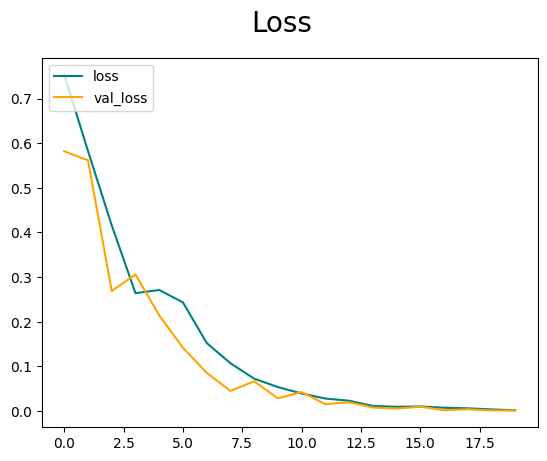

In [28]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

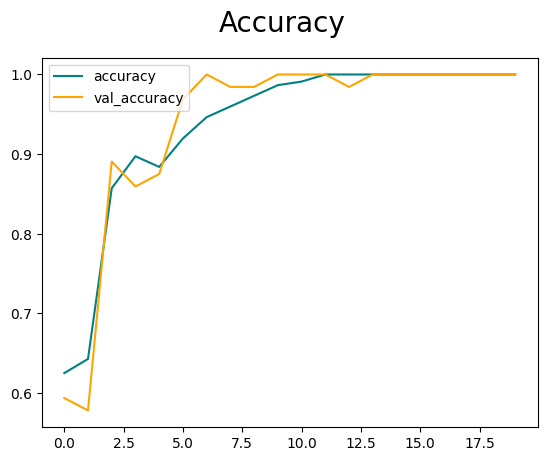

In [29]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [30]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [31]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [32]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 69ms/step


In [33]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [34]:
import cv2

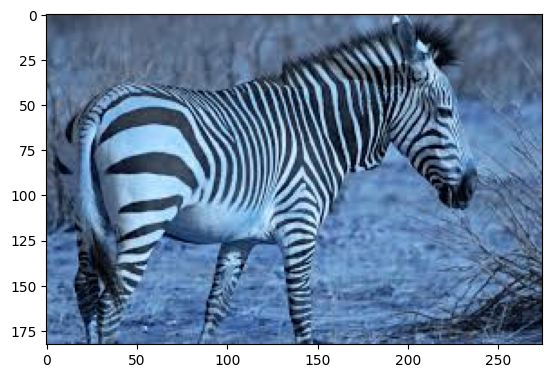

In [57]:
img = cv2.imread('images3.jpeg')
plt.imshow(img)
plt.show()

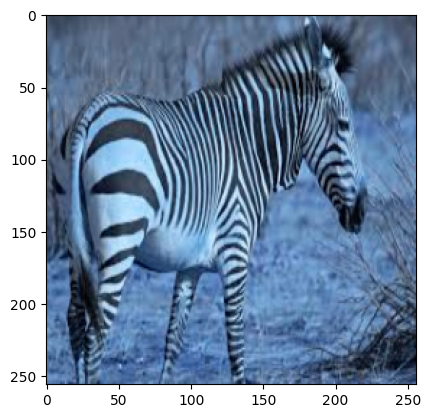

In [58]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [59]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 18ms/step


In [60]:
yhat

array([[0.99996436]], dtype=float32)

In [61]:
if yhat > 0.5: 
    print(f'Predicted class is Zebra')
else:
    print(f'Predicted class is Tiger')

Predicted class is Zebra


# 11. Save the Model

In [44]:
from tensorflow.keras.models import load_model

In [45]:
model.save(os.path.join('models','imageclassifier.h5'))

In [46]:
new_model = load_model('imageclassifier.h5')

In [47]:
new_model.predict(np.expand_dims(resize/255, 0))

array([[0.01972741]], dtype=float32)